In [1]:
#Imports

#Basic Imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import zipfile

#Plotting
import seaborn as sns
%matplotlib inline
sns.set_style('white')

#Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, RidgeClassifier
import statsmodels.api as sm


#Data Infrastructure Pieces
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
zf = zipfile.ZipFile("student.zip")
df = pd.read_csv(zf.open('student-mat.csv'),sep = ";")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df_dumb = pd.get_dummies(df[['sex', 'school', 'higher', 'activities', 'nursery']],drop_first=True)
df_dumb.head()
df_newc = pd.concat([df_dumb,df[['age', 'failures']]], axis=1)

In [6]:
list(df_newc.columns)

['sex_M',
 'school_MS',
 'higher_yes',
 'activities_yes',
 'nursery_yes',
 'age',
 'failures']

In [7]:
df_newc.head()

,sex_M,school_MS,higher_yes,activities_yes,nursery_yes,age,failures
0,0,0,1,0,1,18,0
1,0,0,1,0,0,17,0
2,0,0,1,0,1,15,3
3,0,0,1,1,1,15,0
4,0,0,1,0,1,16,0


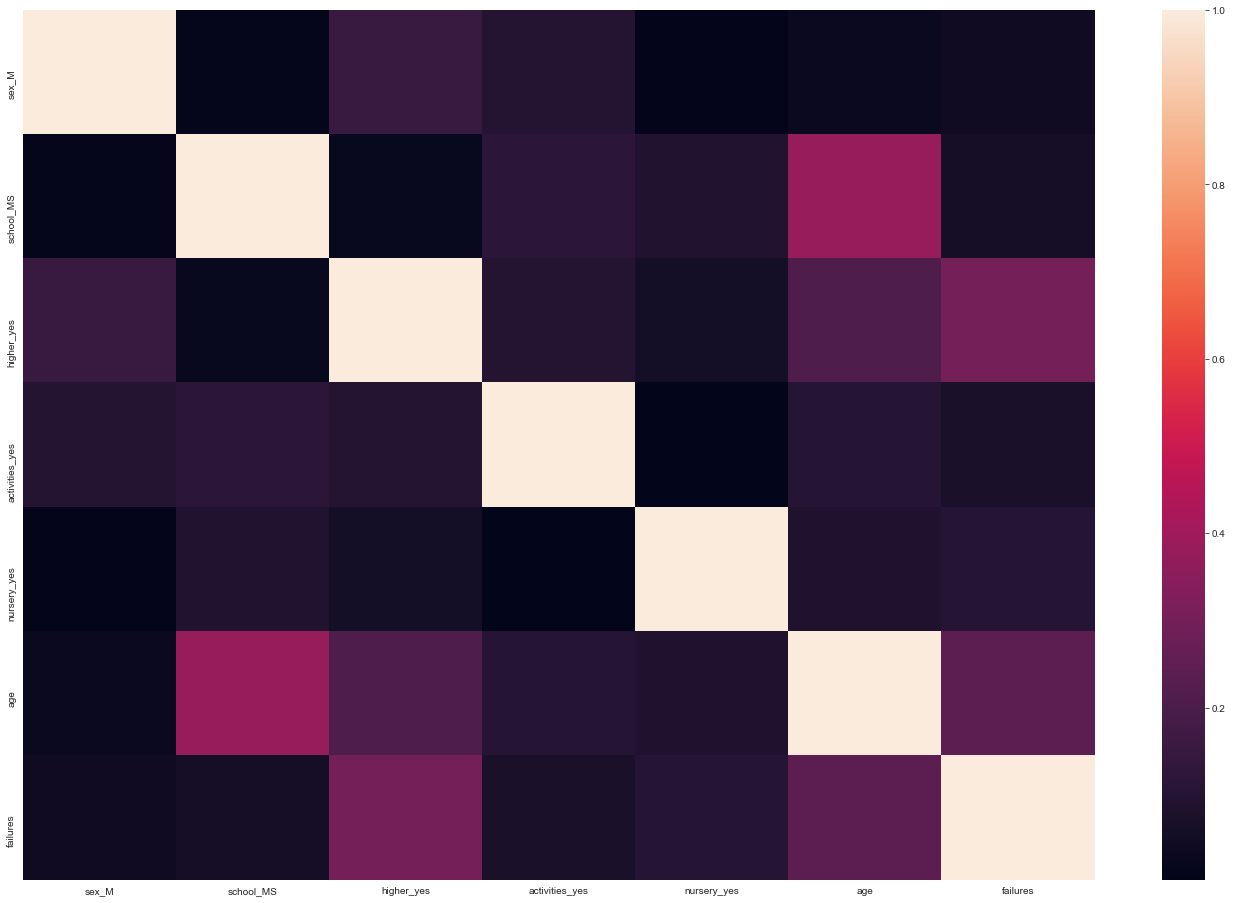

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(24, 16)
sns.heatmap(df_newc.corr().abs())

In [9]:
X = df_newc.drop('activities_yes', axis = 1)
Y = df_newc[['activities_yes']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y, test_size=0.25)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(296, 6) (296, 1)
(99, 6) (99, 1)


In [10]:
# Declare predictors.
X_statsmod = X_train.copy()

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
#X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(Y_train, X_statsmod)
result = logit.fit(maxiter=1000)

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary2())

Optimization terminated successfully.
         Current function value: 28.646319
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: inf       
Dependent Variable: activities_yes   AIC:              16970.6206
Date:               2019-05-25 20:02 BIC:              16992.7628
No. Observations:   296              Log-Likelihood:   -8479.3   
Df Model:           5                LL-Null:          0.0000    
Df Residuals:       290              LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sex_M          0.4412    0.2406   1.8335  0.0667  -0.0304   0.9128
school_MS     -0.3077    0.3853  -0.7988  0.4244  -1.0628   0

C:\Users\postgres\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\postgres\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\postgres\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [11]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_test)

# Code admission as 1 if probability is greater than .5.
pred_Y_statsmod = np.where(pred_statsmod < .6, 0, 1)
pred_Y_statsmod = np.expand_dims(pred_Y_statsmod, axis=1)

In [12]:
confusion_matrix(pred_Y_statsmod, Y_test)

array([[40, 31],
       [ 9, 19]], dtype=int64)

In [13]:
lr = LogisticRegression(C=1e9)
y = df_newc['activities_yes']
X = df_newc[['sex_M', 'school_MS', 'higher_yes']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by participation in Afterschool Activites')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 0.47254341 -0.73704832  1.0812023 ]]
[-1.13235892]

 Accuracy by participation in Afterschool Activites
activities_yes    0    1
row_0                   
0               136  106
1                58   95

 Percentage accuracy
0.5848101265822785


C:\Users\postgres\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Ridge Logistic Regression

In [14]:
ridgemodel = RidgeClassifier(alpha=1.0, class_weight='balanced')
# alpha is default of 1.0 for ridge classifier things changed with balancing the weight class. Encompasses all variables in the entire picture.
ridgemodel.fit(X_train, Y_train)
y_pred=ridgemodel.predict(X_test)
ridgemodel.score(X_test, Y_test)

C:\Users\postgres\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5252525252525253

In [15]:
print(y_pred)

[1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1]


In [16]:
confusion_matrix(y_pred, Y_test)

array([[21, 19],
       [28, 31]], dtype=int64)

In [17]:
print(cross_val_score(ridgemodel, X_train, Y_train, cv=5))

[0.58333333 0.55932203 0.47457627 0.62711864 0.54237288]


C:\Users\postgres\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\postgres\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\postgres\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\postgres\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:839: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [18]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
y = df_newc['activities_yes']
X = df_newc[['sex_M', 'school_MS', 'higher_yes']]
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

C:\Users\postgres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
# Visualize our model
y_min, y_max = X.sex_M.min() - 1, X.sex_M.max() + 3
x_min, x_max = X.school_MS.min() - 1, X.school_MS.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='activities_yes')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()

ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time